In [49]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading
data1 = pd.read_csv("CS_03.csv")
print(data1.shape)




(1324, 10)


In [50]:
data1.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [51]:
data1.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [52]:
# Data Preprocessing
data1[['FuelType', 'MetColor', 'Automatic', 'Doors']] = data1[['FuelType', 'MetColor', 'Automatic', 'Doors']].astype('category')



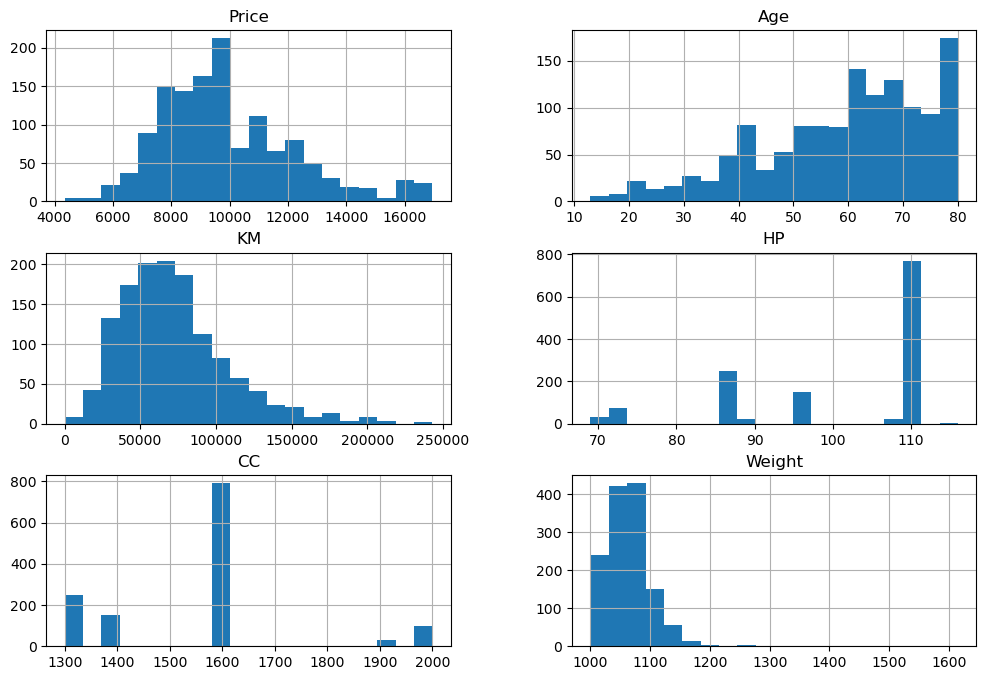

In [53]:
# Continuous Variables Distribution
data1[['Price', 'Age', 'KM', 'HP', 'CC', 'Weight']].hist(bins=20, figsize=(12, 8))
plt.show()



In [54]:
one_hot_encoded = pd.get_dummies(data1['FuelType'], prefix='FuelType' ,dtype=int)
data1 = pd.concat([data1, one_hot_encoded], axis=1)
data1=data1.drop("FuelType" ,axis=1)

one_hot_encoded = pd.get_dummies(data1['MetColor'], prefix='MetColor' ,dtype=int)
data1 = pd.concat([data1, one_hot_encoded], axis=1)
data1=data1.drop("MetColor" ,axis=1)


one_hot_encoded = pd.get_dummies(data1['Automatic'], prefix='Automatic' ,dtype=int)
data1 = pd.concat([data1, one_hot_encoded], axis=1)
data1=data1.drop("Automatic" ,axis=1)

one_hot_encoded = pd.get_dummies(data1['Doors'], prefix='Doors' ,dtype=int)
data1 = pd.concat([data1, one_hot_encoded], axis=1)
data1=data1.drop("Doors" ,axis=1)

In [55]:
data1

,Price,Age,KM,HP,CC,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,MetColor_0,MetColor_1,Automatic_0,Automatic_1,Doors_2,Doors_3,Doors_4,Doors_5
0,13500,23,46986,90,2000,1165,0,1,0,0,1,1,0,0,1,0,0
1,13750,23,72937,90,2000,1165,0,1,0,0,1,1,0,0,1,0,0
2,13950,24,41711,90,2000,1165,0,1,0,0,1,1,0,0,1,0,0
3,14950,26,48000,90,2000,1165,0,1,0,1,0,1,0,0,1,0,0
4,13750,30,38500,90,2000,1170,0,1,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,8450,80,23000,86,1300,1015,0,0,1,1,0,1,0,0,1,0,0
1320,7500,69,20544,86,1300,1025,0,0,1,0,1,1,0,0,1,0,0
1321,10845,72,19000,86,1300,1015,0,0,1,1,0,1,0,0,1,0,0
1322,8500,71,17016,86,1300,1015,0,0,1,1,0,1,0,0,1,0,0


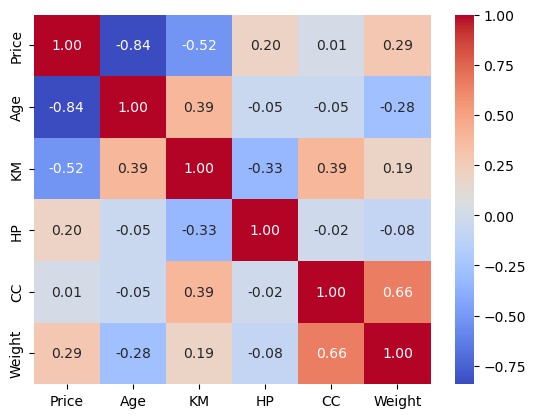

In [56]:
# Correlation Analysis
correlation_matrix = data1[['Price', 'Age', 'KM', 'HP', 'CC', 'Weight']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()



In [57]:
# Train-Test Data Split
np.random.seed(1234)
train_cases = np.random.choice(data1.index, size=int(len(data1) * 0.7), replace=False)
train = data1.loc[train_cases]
test = data1.drop(train_cases)

# Linear Regression Model
X_train = sm.add_constant(train[['KM', 'Age', 'HP', 'CC', 'Weight']])
y_train = train['Price']
model = sm.OLS(y_train, X_train).fit()


# Show OLS Regression Results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     772.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:30:29   Log-Likelihood:                -7757.5
No. Observations:                 926   AIC:                         1.553e+04
Df Residuals:                     920   BIC:                         1.556e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5145.8085   1203.798      4.275      0.0

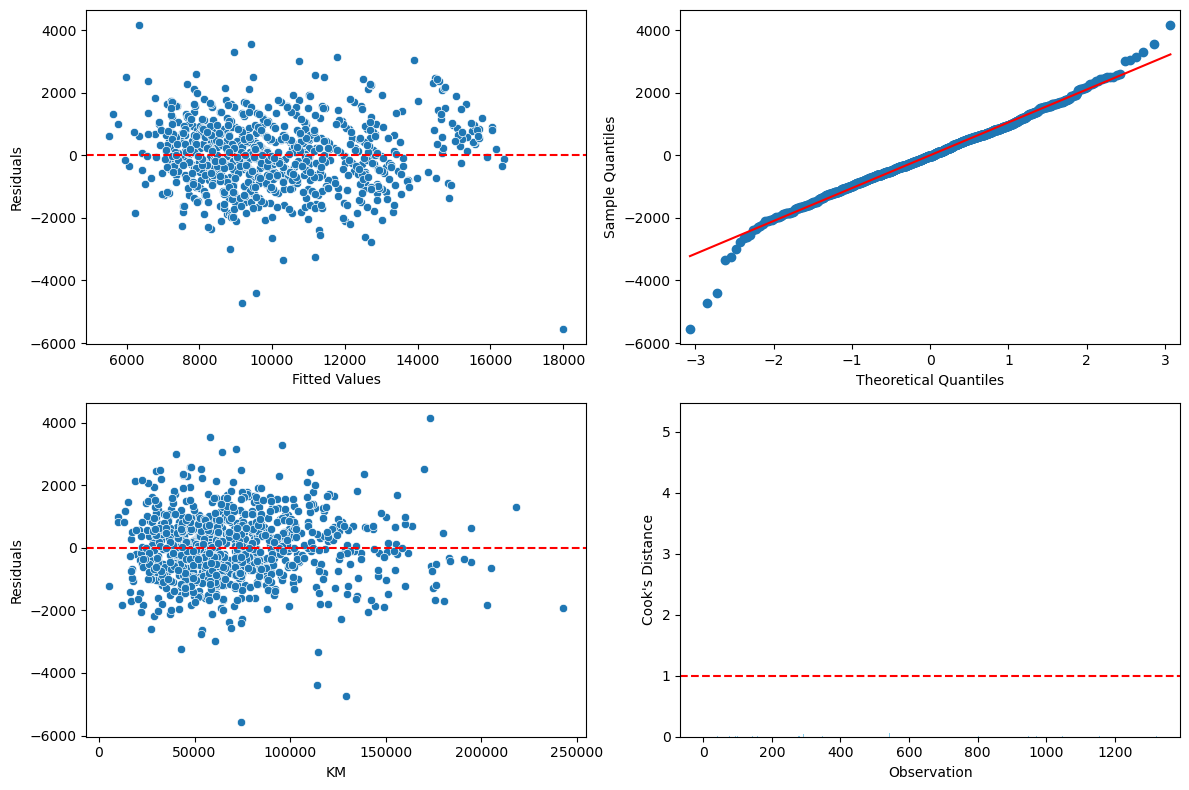

In [58]:
# Model Diagnostics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Residuals vs Fitted
sns.scatterplot(x=model.fittedvalues, y=model.resid, ax=axes[0, 0])
axes[0, 0].set_xlabel("Fitted Values")
axes[0, 0].set_ylabel("Residuals")
axes[0, 0].axhline(y=0, color='r', linestyle='--')

# QQ Plot
sm.qqplot(model.resid, line='r', ax=axes[0, 1])

# Residuals vs KM
sns.scatterplot(x=train['KM'], y=model.resid, ax=axes[1, 0])
axes[1, 0].set_xlabel("KM")
axes[1, 0].set_ylabel("Residuals")
axes[1, 0].axhline(y=0, color='r', linestyle='--')

# Cook's Distance
axes[1, 1].bar(train.index, model.get_influence().cooks_distance[0], color='skyblue')
axes[1, 1].set_xlabel("Observation")
axes[1, 1].set_ylabel("Cook's Distance")
axes[1, 1].axhline(y=1, color='r', linestyle='--')

plt.tight_layout()
plt.show()

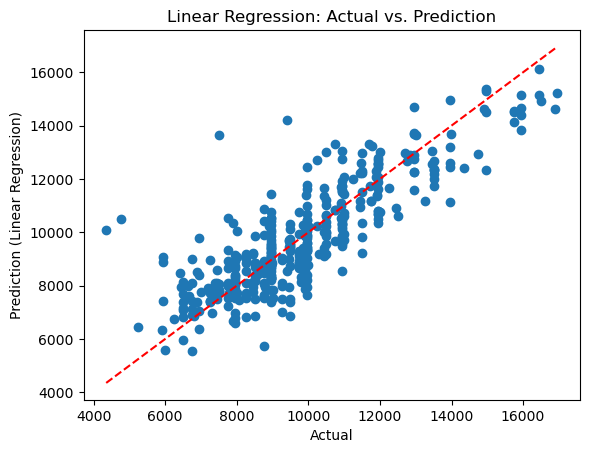

In [59]:
# Prediction on Test Set for Linear Regression
X_test = sm.add_constant(test[['KM', 'Age', 'HP', 'CC', 'Weight']])
y_test = test['Price']
test['pred'] = model.predict(X_test)


# Visualization of Prediction vs Actual for Linear Regression
plt.scatter(test['Price'], test['pred'])
plt.plot([min(test['Price']), max(test['Price'])], [min(test['Price']), max(test['Price'])], linestyle='--', color='red')
plt.xlabel("Actual")
plt.ylabel("Prediction (Linear Regression)")
plt.title("Linear Regression: Actual vs. Prediction")
plt.show()


In [60]:

# Random Forest Model
X_train_rf = train.drop("Price", axis=1)
y_train_rf = train['Price']

Extra features in test set: {'pred'}


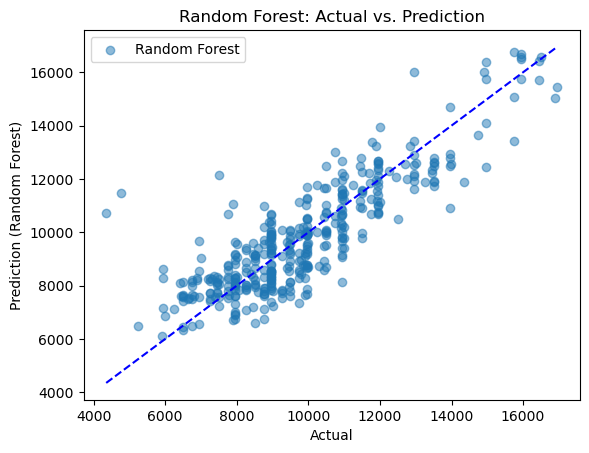

In [61]:
rf_model = RandomForestRegressor(random_state=1234)
rf_model.fit(X_train_rf, y_train_rf)

# Prediction on Test Set for Random Forest
X_test_rf = test.drop("Price", axis=1)
y_test_rf = test['Price']


# Check for extra features in the test set
extra_features = set(X_test_rf.columns) - set(X_train_rf.columns)

if extra_features:
    print(f"Extra features in test set: {extra_features}")
    # Remove the extra features from the test set
    X_test_rf = X_test_rf.drop(extra_features, axis=1)

# Now, try making predictions again
predictions_rf = rf_model.predict(X_test_rf)

# Visualization code remains unchanged
plt.scatter(test['Price'], predictions_rf, label='Random Forest', alpha=0.5)
plt.plot([min(test['Price']), max(test['Price'])], [min(test['Price']), max(test['Price'])], linestyle='--', color='blue')
plt.xlabel("Actual")
plt.ylabel("Prediction (Random Forest)")
plt.title("Random Forest: Actual vs. Prediction")
plt.legend()
plt.show()


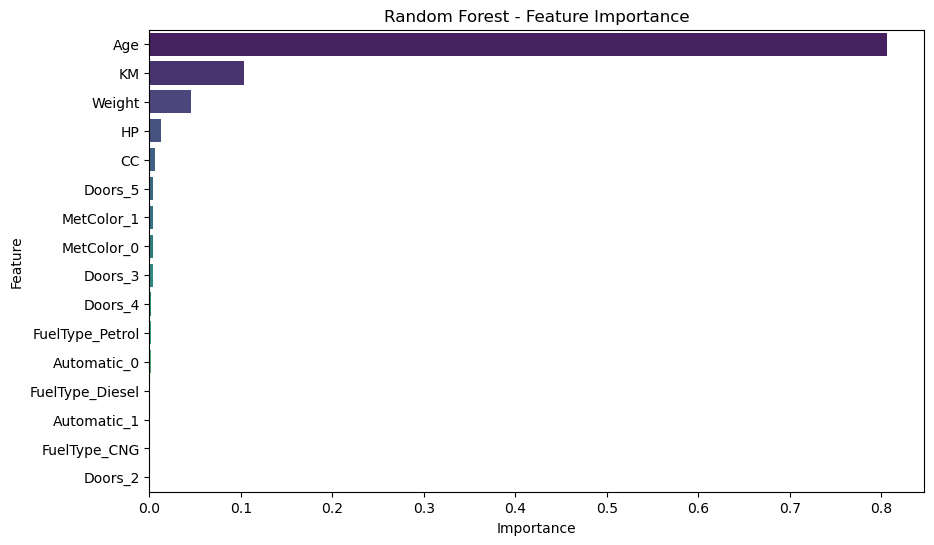

In [62]:
# Getting Variable Importance
feature_importance = rf_model.feature_importances_

# Creating a DataFrame for easier visualization
importance_df = pd.DataFrame({'Feature': X_train_rf.columns, 'Importance': feature_importance})

# Sorting the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



In [63]:
# Performance Metrics for Random Forest
mae_rf = mean_absolute_error(y_test_rf, predictions_rf)
mape_rf = np.mean(np.abs(y_test_rf - predictions_rf) / y_test_rf * 100)
print("\nRandom Forest Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%")


Random Forest Metrics:
Mean Absolute Error (MAE): 899.92
Mean Absolute Percentage Error (MAPE): 9.94%
